<a href="https://colab.research.google.com/github/pavanghai/Lambda/blob/master/BuildWeek_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **optional build-week project? ** [Link](https://www.eia.gov/dnav/pet/xls/PET_MOVE_EXP_DC_NUS-Z00_MBBL_M.xls)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import plotly.graph_objects as go
# import datetime as dt

In [0]:
# file has 2 sheets, getting data from 2nd sheet, excluding first 2 rows as headeds are in 3rd row
df = pd.read_excel('https://www.eia.gov/dnav/pet/xls/PET_MOVE_EXP_DC_NUS-Z00_MBBL_M.xls', sheet_name= 'Data 1', header=2) 

In [0]:
# Changing Column Header Names 
colHeadName=df.columns
colHeadName=colHeadName.str.replace('U.S. Exports of','')
colHeadName=colHeadName.str.replace('Thousand Barrels','')
colHeadName=colHeadName.str.replace('U.S. Exports to U.S. of','')  
colHeadName=colHeadName.str.replace("(",'')
colHeadName=colHeadName.str.replace(")",'')
colHeadName=colHeadName.str.strip()
df.columns = colHeadName

In [0]:
# Droping 2 columns as it contains 0 values only and replacing original Dataframe
print(df.shape)
df=df.drop(['Aviation Gasoline Blending Components', 'Aviation Gasoline'], axis=1)
print(df.shape)

(1201, 51)
(1201, 49)


In [0]:
# Making list for Visulization 
c1_468= ['Crude Oil and Petroleum Products', 'Propane and Propylene', 'Normal Butane-Butylene', 'Hydrocarbon Gas Liquids', 'Liquified Petroleum Gases', 'Finished Petroleum Products', 
         'Lubricants', 'Waxes', 'Petroleum Coke', 'Asphalt and Road Oil', 'Miscellaneous Petroleum Products', 'Kerosene-Type Jet Fuel']
all_column = ['Crude Oil', 'Residual Fuel Oil', 'Finished Motor Gasoline', 'Distillate Fuel Oil', 'Kerosene-Type Jet Fuel',
              'Crude Oil and Petroleum Products', 'Hydrocarbon Gas Liquids', 'Liquified Petroleum Gases', 'Propane and Propylene', 
              'Normal Butane-Butylene', 'Asphalt and Road Oil', 'Finished Petroleum Products', 'Miscellaneous Petroleum Products',
              'Petroleum Coke', 'Waxes', 'Lubricants', 'Kerosene', 'Ethane-Ethylene', 'Natural Gasoline', 'Pentanes Plus', 'Special Naphthas',
              'Naphtha for Petrochemical Feedstock Use', 'Other Liquids', 'Gasoline Blending Components', 'Other Hydrocarbons/Oxygenates',
              'Distillate Fuel Oil, Greater than 15 to 500 ppm Sulfur', 'Conventional Motor Gasoline', 'Distillate Fuel Oil, Greater Than 500 ppm Sulfur',
              'Reformulated Motor Gasoline', 'Propane', 'Normal Butane', 'Conventional Gasoline Blending Components', 'MTBE', 'Other Oxygenates',
              'Reformulated Gasoline Blending Components', 'Isobutane-Isobutylene', 'Other Oils for Petrochemical Feedstock Use', 
              'Distillate Fuel Oil, 0 to 15 ppm Sulfur', 'Renewable Fuels including Fuel Ethanol', 'Natural Gas Liquids', 'Fuel Ethanol', 
              'Oxygenates excluding Fuel Ethanol', 'Biomass-Based Diesel Fuel', 'Unfinished Oils', 'Naphthas and Lighter', 'Ethane', 
              'Kerosene and Light Oils', 'Isobutane']

In [0]:
# This will count all not null values and display sorted count
df.notnull().sum().sort_values(ascending=False)

Date                                                      1201
Crude Oil                                                 1201
Residual Fuel Oil                                         1009
Finished Motor Gasoline                                    901
Distillate Fuel Oil                                        901
Kerosene-Type Jet Fuel                                     469
Crude Oil and Petroleum Products                           469
Hydrocarbon Gas Liquids                                    469
Liquified Petroleum Gases                                  469
Propane and Propylene                                      469
Normal Butane-Butylene                                     469
Asphalt and Road Oil                                       469
Finished Petroleum Products                                469
Miscellaneous Petroleum Products                           469
Petroleum Coke                                             469
Waxes                                                  

In [0]:
#checking changed results
pd.set_option('display.max_rows', 1500)
# pd.set_option('display.max_columns',55)
# print(df.describe(exclude='number'), df.describe())

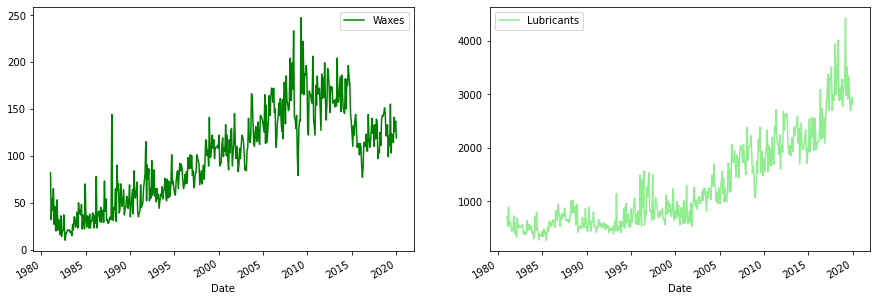

In [0]:
fig = plt.figure(figsize=(15,5))

# # Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)
# # Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)
df.dropna(subset=['Waxes']).plot(x='Date', y='Waxes',c='green', ax=ax1)
df.dropna(subset=['Lubricants']).plot(x='Date', y='Lubricants',c='lightgreen', ax=ax2);

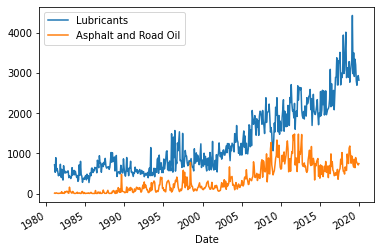

In [0]:
df.dropna(subset=['Waxes']).plot(x='Date', y=['Lubricants', 'Asphalt and Road Oil'])

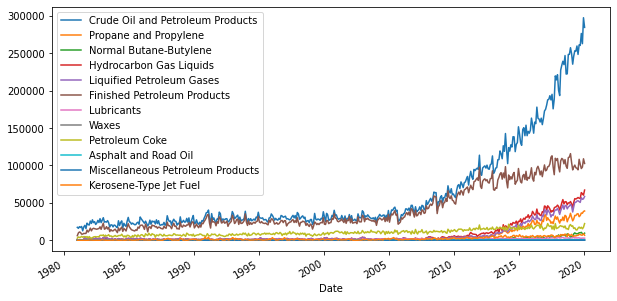

In [0]:
df.dropna(subset=['Waxes']).plot(x='Date', y=c1_468,figsize=(10,5))

In [0]:
# sum values based on date range

In [0]:
# df1.head(3)

In [0]:
df.shape

(1201, 49)

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Crude Oil'], name="Crude Oil"))

fig.update_layout(title_text='US Exports of Crude Oil',
                  xaxis_rangeslider_visible=True)
fig.show()

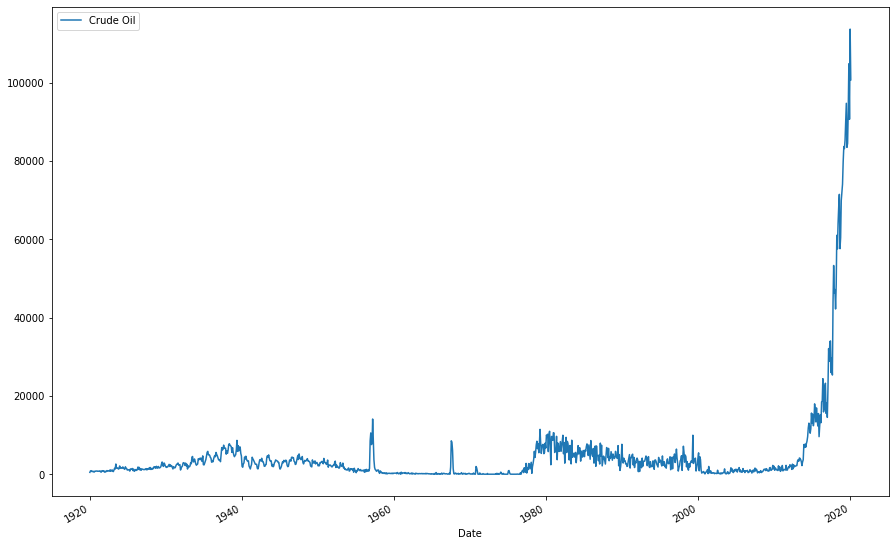

In [0]:
# df.plot(x='Date', y=['Crude Oil'], kind='bar',figsize=(15,10),);
df.plot.line(x='Date', y=['Crude Oil'],figsize=(15,10));
# df.plot.bar(x='Date',y='Crude Oil',)


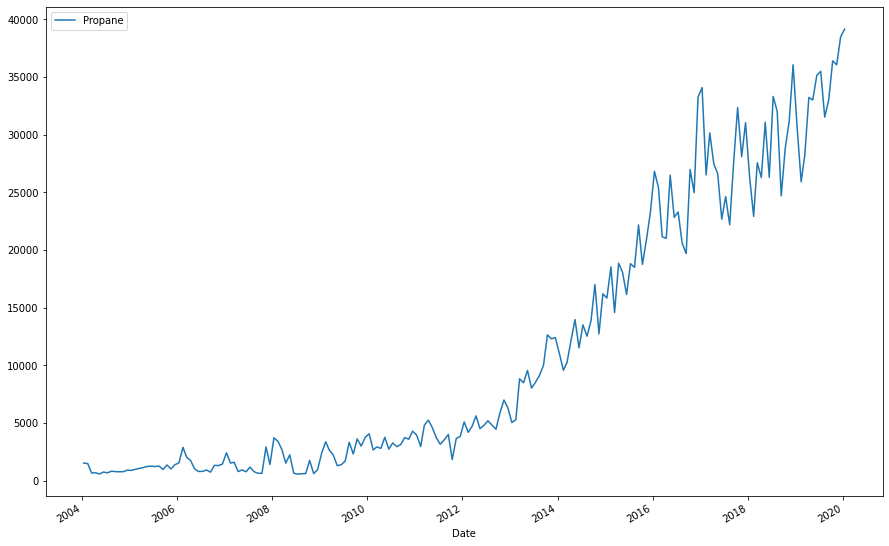

In [0]:
df1=df[df['Propane'].notna()]
df1.plot.line(x='Date', y='Propane',figsize=(15,10));

# df.plot.line(x='Date', y=['Propane'],figsize=(15,10));

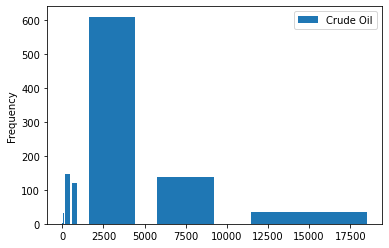

In [0]:
df[['Crude Oil']].plot(kind='hist',bins=[0,10,20, 30, 50, 100, 500, 1000, 5000, 10000, 20000],rwidth=0.7)
plt.show()

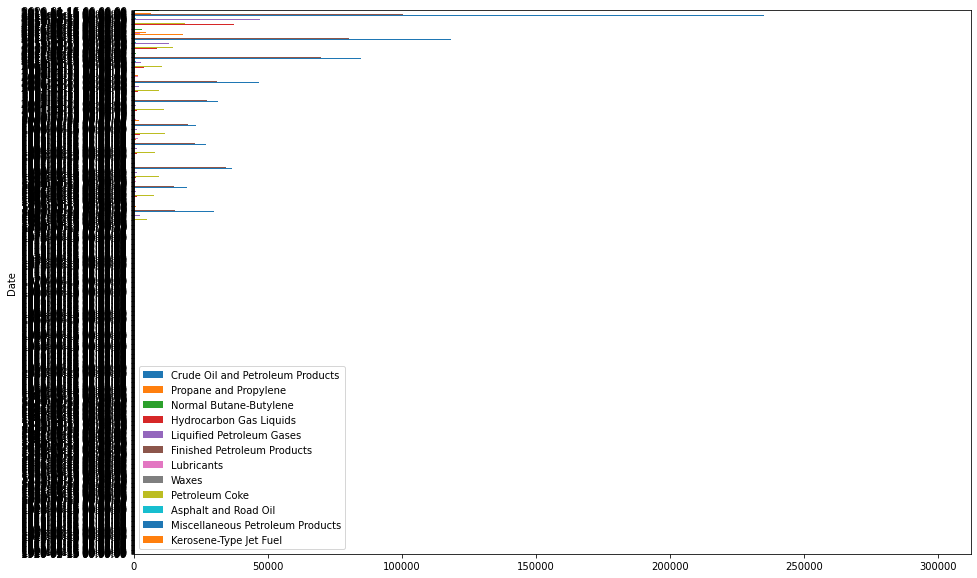

In [0]:
df.plot.barh(x='Date', y=c1_468, figsize=(15,10));

In [0]:
# df[df['Date'].dt.year == 1920]['Crude Oil']

In [0]:
# find value of crude oil only for 1920
# df.loc[df["Date"] == "1920", "Crude Oil"]
# df[df['Date'] == '1920-01-15']['Crude Oil']

In [0]:
# import plotly.express as px

# df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
# fig = px.bar(df, y='pop', x='country', text='pop')
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()